<a href="https://colab.research.google.com/github/dana-prthv/LINYA-Internship/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [32]:
url = 'https://raw.githubusercontent.com/dana-prthv/LINYA-Internship/main/diabetes.csv'
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.shape

(768, 9)

In [34]:
df.isnull().values.any()

False

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'DPF'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

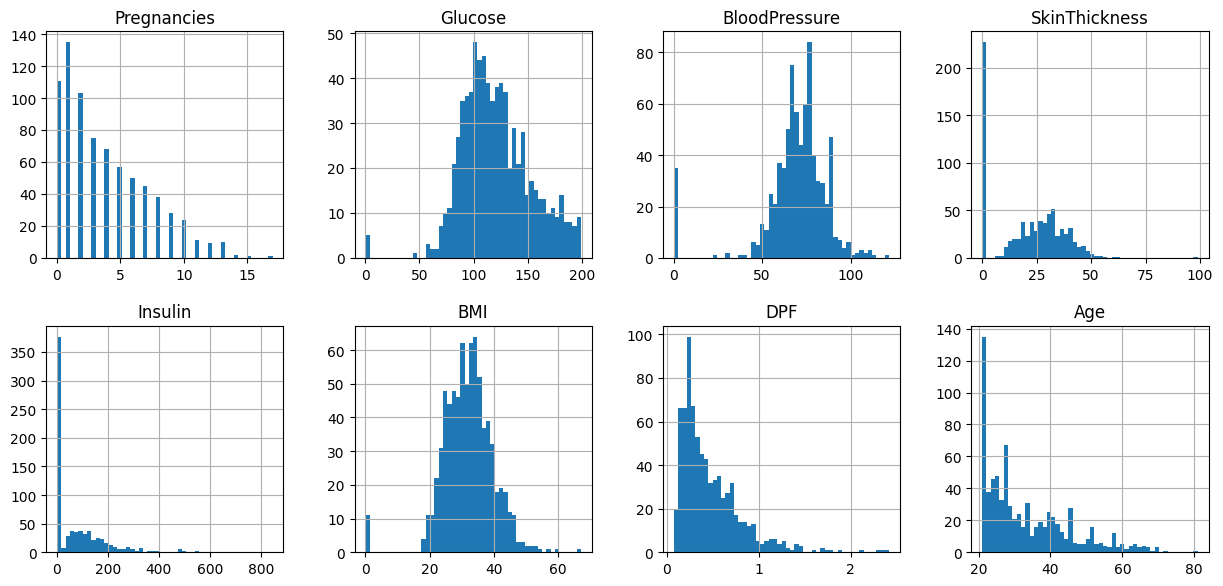

In [37]:
columns = list(df)[0:-1]
df[columns].hist(bins=50,figsize=(15,45), layout=(12,4))

In [41]:
df.rename(columns = {'DiabetesPedigreeFunction':'DPF',}, inplace = True)
df.rename(columns = {'BloodPressure':'BP','SkinThickness': 'SkinTh'}, inplace = True)

In [42]:
df.corr()

,Pregnancies,Glucose,BP,SkinTh,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinTh,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


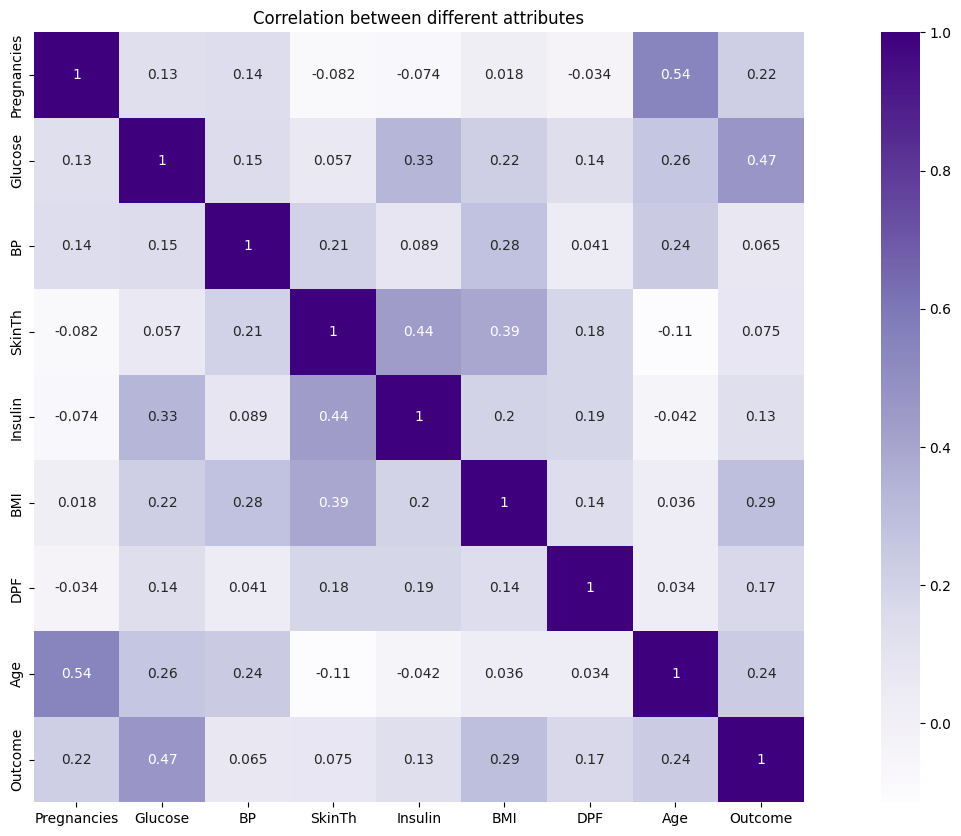

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='Purples')
plt.title('Correlation between different attributes')
plt.show()

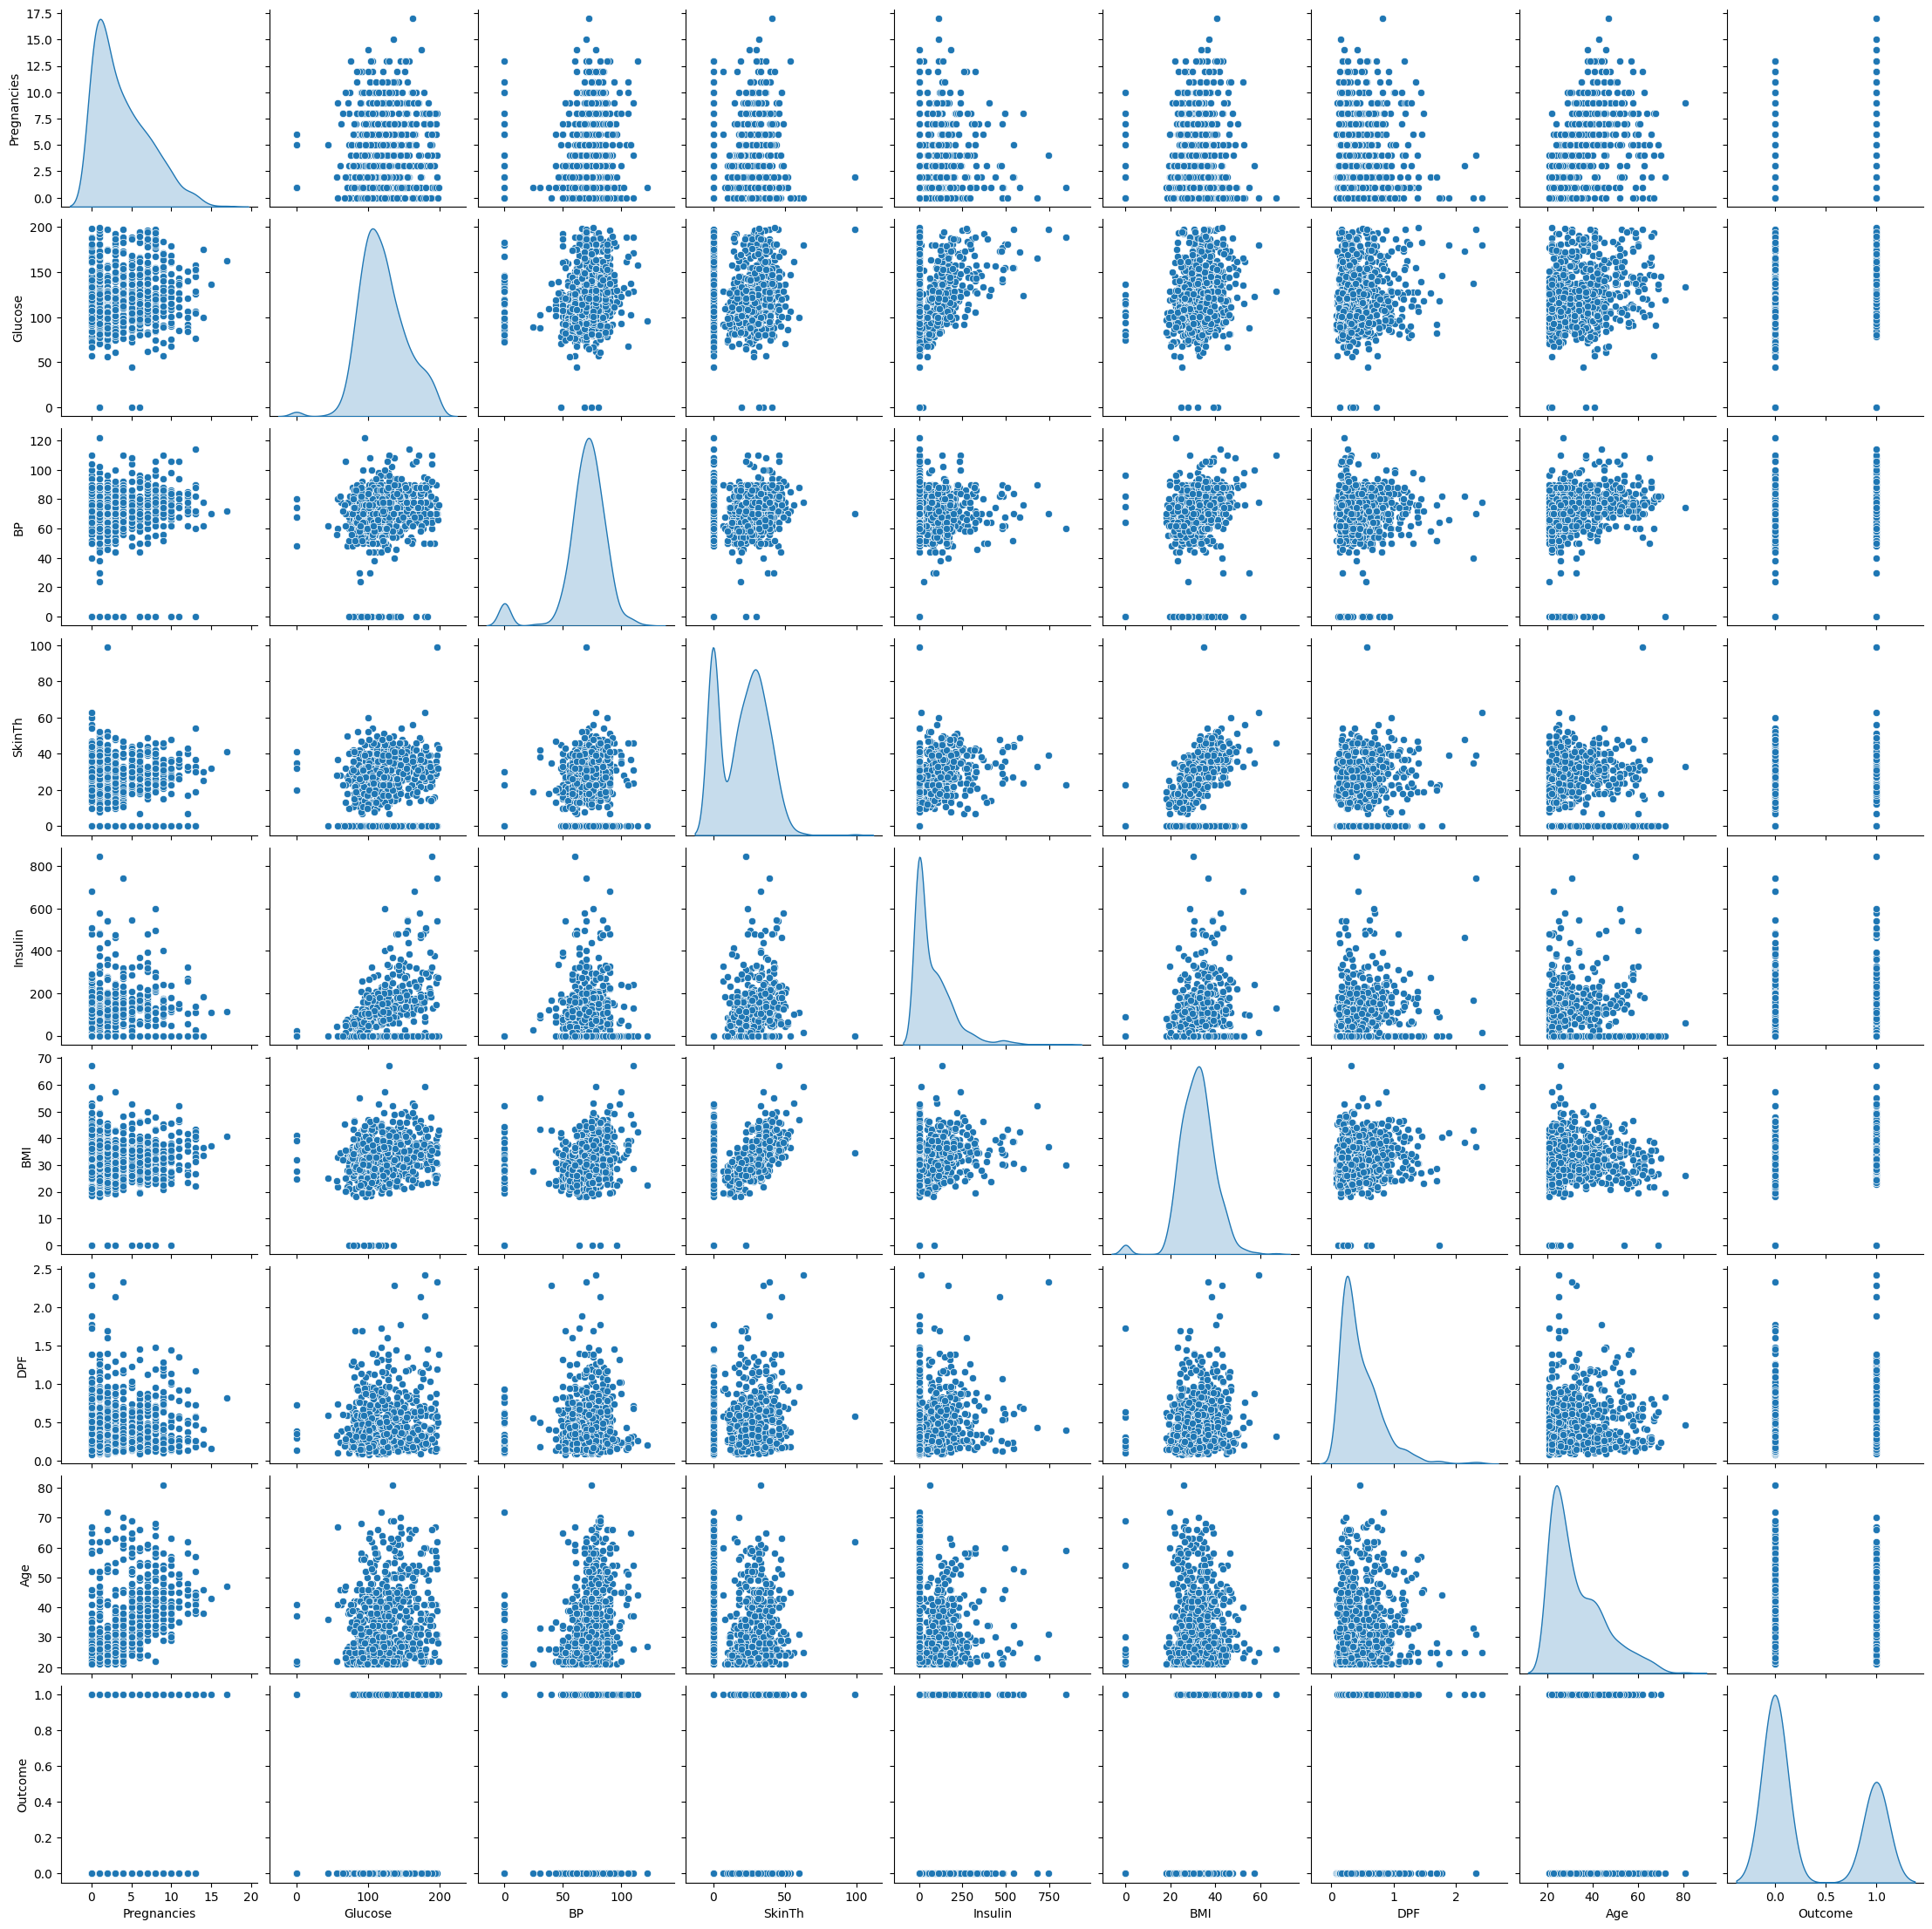

In [45]:
sns.pairplot(df,diag_kind='kde')

In [46]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [47]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [50]:
X_train.shape

(537, 8)

In [51]:
X_test.shape

(231, 8)

In [54]:
#Replacing zeros with mean values
replace_ = SimpleImputer(missing_values=0, strategy='mean')

cols=X_train.columns

X_train = pd.DataFrame(replace_.fit_transform(X_train))
X_test = pd.DataFrame(replace_.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

In [55]:
X_train.head()

,Pregnancies,Glucose,BP,SkinTh,Insulin,BMI,DPF,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train,y_train)
print(model.coef_, model.intercept_)

[[ 1.25168739e-01  3.27430880e-02 -1.39397926e-02 -5.19375724e-03
  -1.56234951e-04  1.12132684e-01  7.86450303e-01  2.05311724e-02]] [-8.9350038]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [62]:
model_score = model.score(X_test,y_test)
print("The model score is {}". format(model_score))

The model score is 0.7792207792207793


Text(0.5, 1.0, 'Confusion Matrix')

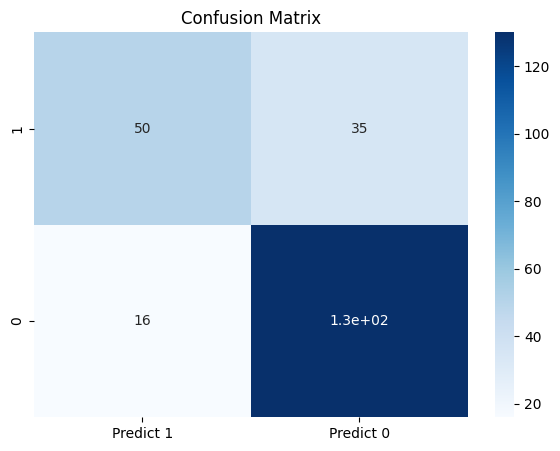

In [63]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(conf_matrix, index= [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True, cmap='Blues')
plt.title("Confusion Matrix")

In [65]:
print('Classification Report')
print(metrics.classification_report(y_test,y_pred,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.76      0.59      0.66        85
           0       0.79      0.89      0.84       146

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

